# Data Science Project: Assessment 3

Student ID: 201573062

This assessment has a 60% weight.

## Import External Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import graphviz
from math import sqrt
from IPython import display

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import sklearn.cluster as cluster
from sklearn.cluster import KMeans

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Import Assesment Dataset/DF

In [2]:
global_path_df = r"C:\Users\edgar\OneDrive\Desktop\Coding\Python\Master Degree AI\Data Science\Unit 7 - Final Assesment\creditcard dataset small.csv"
data = pd.read_csv(global_path_df) # Import Payload
df = pd.DataFrame(data) # Passing Payload as DF

## Case study

BitsBank wants to catch suspicious credit card transactions for further fraud investigation. The bank decided to invest in a new system and tasked you with the mission of building a prediction model that is capable of detecting potential fraudulent transactions. Their budget for the system is £1million. The bank provided us with their historical transactions data. Each record constitutes a set of attributes for each transaction with a flag of either being normal or fraudulent. The original attributes have been passed through a PCA process that gave the set of features that we see in the dataset. This has been done for two reasons: firstly to reduce the dimensionality of the dataset, and secondly to anonymise the information of their customers. Fraudulent cases constitute a small percentage of the overall transactions. [The dataset can be downloaded here](https://minerva.leeds.ac.uk/bbcswebdav/xid-18675934_4).  

Each case that is nominated by your predictive model to be fraudulent and turns out to be not fraudulent costs the bank around £1k. Such cases harm the bank’s customer satisfaction ratings. The bank is willing to allow an annual budget for these cases of £30k. (Hint: constitutes false positives.) 

Each case that is not nominated by your predictive model to be fraudulent and turns out to be fraudulent costs the bank £10k on average. Such cases harm the bank’s reputation and costs them future customers. The bank is willing to allow an annual budget for these cases of £50k. (Hint: constitutes false negatives.)

Their main requirements are: 

1. to catch at least 90% of actual fraudulent cases 

2. to ensure that at least 70% of the predicted cases for further investigation are actually fraudulent.



## 1. Aims, objectives and plan

### a) Aims and objectives (2 marks)

Project Summary:

The Brits Bank is required to develop a predictive model that can predict fraudulent credit card transactions. The bank has supplied historical data which has been pre-processed via the PCA process to ensure the anonymity of the bank's clients information and also to reduce the total dataset dimensionality. The dataset is comprised of the credit card transaction records with a flag of being normal or fraudulent. 

1.Project conditions: 

1.1 If the model states that the case is fraudulent while it is not:
	then it costs £1K per case and the annual budget is £30K
    
1.2 Else if the model states that the case is not fraudulent while it is:
	then it costs £10K per case and the annual budget is £50K

1.3 The model must be able to detect 90% of actual fraudulent transactions.

1.4 To ensure that 70% of predicted cases for further investigation are fraudulent.

2.Project approach:

2.1 Understand data and determine which 2 techniques can be used to build prediction.

2.2 Prepare data according to the model needs. This involves removing synonymous data, changing headers where needed and determining the label. 

2.3 Select models hyperparameters, split data into training and testing.

2.4 Fit and train the model.

2.5 Optimise the hyperparameters.

2.6 Conduct cross-validation to determine which model performs best and fits business needs.

2.7 Derive the conclusion.

###  b) Plan (2 marks)
Please demonstrate how you have conducted the project with a simple Gantt chart.

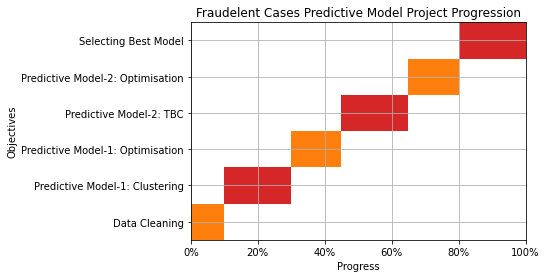

In [3]:
fmt = '%.0f%%' # Create object for the xaxis as %

dig, gnt = plt.subplots()# Declaring x and y axis and creating matrix
gnt.set_ylim(0,60) # y axis max limit
gnt.set_xlim(0,100) # x axis max limit
gnt.xaxis.set_major_formatter(mtick.PercentFormatter()) # Setting x axis as %
gnt.set_xlabel("Progress") # Naming the x axis
gnt.set_ylabel("Objectives") # Naming the y axis
gnt.set_title("Fraudelent Cases Predictive Model Project Progression")

gnt.set_yticks([5,15,25,35,45,55]) # Selecting y axis/ objective points
gnt.set_yticklabels(["Data Cleaning","Predictive Model-1: Clustering","Predictive Model-1: Optimisation","Predictive Model-2: TBC","Predictive Model-2: Optimisation","Selecting Best Model"]) # Renaming tick values
gnt.grid(True) # Enabling chart grid

# Decleraing x axis / Progress points
gnt.broken_barh([(0,10)], (0, 10), facecolors =('tab:orange'))
gnt.broken_barh([(10,20)], (10, 10), facecolors =('tab:red'))
gnt.broken_barh([(30,15)], (20, 10), facecolors =('tab:orange'))
gnt.broken_barh([(45,20)], (30, 10), facecolors =('tab:red'))
gnt.broken_barh([(65,15)], (40, 10), facecolors =('tab:orange'))
gnt.broken_barh([(80,20)], (50, 10), facecolors =('tab:red')) 

## 2. Understanding the case study

###  Case study analysis (8 marks)
State the key points that you found in the case and how you intend to deal with them appropriately to address the bank's needs. (You can include more than four points.)

200-300 words

1. The datasets includes the label "Normal" which indicates if the transactions were fraudulent or not. This can be used for classification techniques as it has a binary attributes. The datasets consist of 9996 value entries excluding the header. 9505 or 95% of them belong to binary class 1 while 492 or 5% are attributed to class 0. Given scenario, data inconsistencies and missing values in the "V1" this can suggest that the fraudulent cases belong to class 0. Neverthlss this also indicates unbalanced label problem where one class is dominant in the vector. This can have have i direct implication onto model accurasy therefore hyperparamter opitimisation will be required.

2. Given fact that label has been provided with dataset, it is safe to asume that Supervised Larning techniques are applicable in this case. 

3. The intial dataset observations indicates that Rescaling techniques could. This garantuees that the range of the new features in columns [V1:V28] will be between [0, 1] therefore increasing predictive model perforamnce efficiency.  

4. Intial dataset observations suggest that columns "V28" and "V28.1" are duplicates. This can be checked and removed if true using pandas.    

5. The "Time" column could be converted into timestamp and could be used as part of Classificaiton. Pandas library has a capabilties to tackle such a tasks however, further testing is required to understand if timestamp column does have an impact onto prediction model performance.  

6. The "Amount" column can be treated as noise as it has an adverse impact on the predictive model.

7. Birts Bank is requested to build a predictive model therefore a predictive performance metrics will be used to analyse 

## 3. Pre-processing applied 
Enter the code in the cells below to execute each of the stated sub-tasks. 


### Stats and Visualisation for Classes: Before Data Preparation



<BarContainer object of 2 artists>

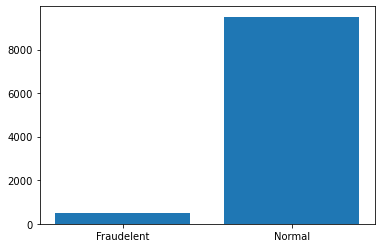

In [4]:
# Visualing dataset classes
transactions_fraud = df[df["Normal"]==0].shape[0]
transactions_normal = df[df["Normal"]==1].shape[0]
plt.bar(["Fraudelent", "Normal"], [transactions_fraud, transactions_normal])


###  a) Preparing the labels appropriately (4 marks)

In [5]:
df.rename(columns = {"Time": "Transaction_Time", "Amount": "Transaction_Amount", "Normal":"If_Fraudulent_Flag"}, inplace=True)
df["Transaction_Time"] = pd.to_datetime(df["Transaction_Time"], unit='s') # Converting int to datatime
df["Transaction_Time"] = df["Transaction_Time"].dt.strftime("%H:%M:%S") # Removing noisy year/month/day values.

###  b) Removing synonymous and noisy attributes (4 marks)


In [6]:
# Intial observations indicates that V28 and V28.1 might be duplicate columns
if df["V28"].equals(df["V28.1"]):
    df = df.drop("V28.1", axis=1)
else:
    pass

df = df.drop("Transaction_Amount", axis=1)

###  c) Dealing with missing values (4 marks)


In [7]:
miss_values = df.isnull().any() # Checking if any of the columns includes the missing data
miss_column = df[df["V1"].isnull()].shape[0]
print(df["V1"].dtypes) # Confirms float datatype

meanV1 = float(df["V1"].mean())
df = df.fillna(meanV1)

float64


In [8]:
for col in df.columns: # Double checking for missing values
    
    missing_data = df[df[col].isnull()].shape[0]
    print('Before Filtering Out Missing {}, No of Records is {} '.format(col, missing_data))
    
    df = df.dropna()
    df.head(10)
    
    missing_data = df[df[col].isnull()].shape[0]
    print('Before Filtering Out Missing {}, No of Records is {} '.format(col, missing_data))

Before Filtering Out Missing Transaction_Time, No of Records is 0 
Before Filtering Out Missing Transaction_Time, No of Records is 0 
Before Filtering Out Missing V1, No of Records is 0 
Before Filtering Out Missing V1, No of Records is 0 
Before Filtering Out Missing V2, No of Records is 0 
Before Filtering Out Missing V2, No of Records is 0 
Before Filtering Out Missing V3, No of Records is 0 
Before Filtering Out Missing V3, No of Records is 0 
Before Filtering Out Missing V4, No of Records is 0 
Before Filtering Out Missing V4, No of Records is 0 
Before Filtering Out Missing V5, No of Records is 0 
Before Filtering Out Missing V5, No of Records is 0 
Before Filtering Out Missing V6, No of Records is 0 
Before Filtering Out Missing V6, No of Records is 0 
Before Filtering Out Missing V7, No of Records is 0 
Before Filtering Out Missing V7, No of Records is 0 
Before Filtering Out Missing V8, No of Records is 0 
Before Filtering Out Missing V8, No of Records is 0 
Before Filtering O

###  d) Rescaling if necessary (4 marks)

In [9]:
scaling_max = MinMaxScaler() # Scaling object
scaling_range = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]
df[scaling_range] = scaling_max.fit_transform(df[scaling_range]) # Scaling training

### Stats and Visualisation for Classes: After Data Preparation


<BarContainer object of 2 artists>

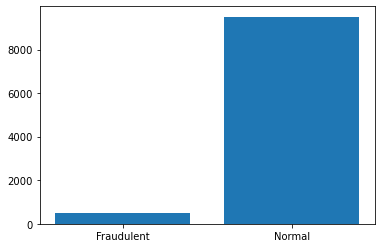

In [10]:
# Visual control which cehcks if datasets labels were affected in anyway during the data preparation procedures
transactions_frau = df[df["If_Fraudulent_Flag"]==0].shape[0]
transactions_norma = df[df["If_Fraudulent_Flag"]==1].shape[0]
plt.bar(["Fraudulent", "Normal"], [transactions_frau, transactions_norma])

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process (8 marks)

The original datasets contained the binary label, therefore, indicated that supervised learning techniques can be used in both prediction instances. 
Given the assumption that the dataset remains consistent, the k-nearest neighbour (kNN) algorithm could be used to predict fraudulent credit card transactions. 
One of the primary KNN algorithm benefits is that it does not require a predetermined assumption. The algorithm classifies the new data point by iterating through the entire dataset to find out the kNN The algorithm assigns the new data entry based on learning from historical data with the majority class in the nearest neighbour. Given kNN is a memory-based algorithm, the classifier immediately respond to changes in the input. 
On the other hand, it is also important to note that kNN best works on standardised data which ranges between 0 and 1 and it is not suitable for large dimensionality. Also, kNN requires the user to deal with missing values as it can largely impact the performance metrics therefore data preparation techniques were used for the kNN model during this project.
Finally, kNN is a standard prediction model which is easy to maintain and is cost-efficient therefore applicable to the Brits Banks needs.

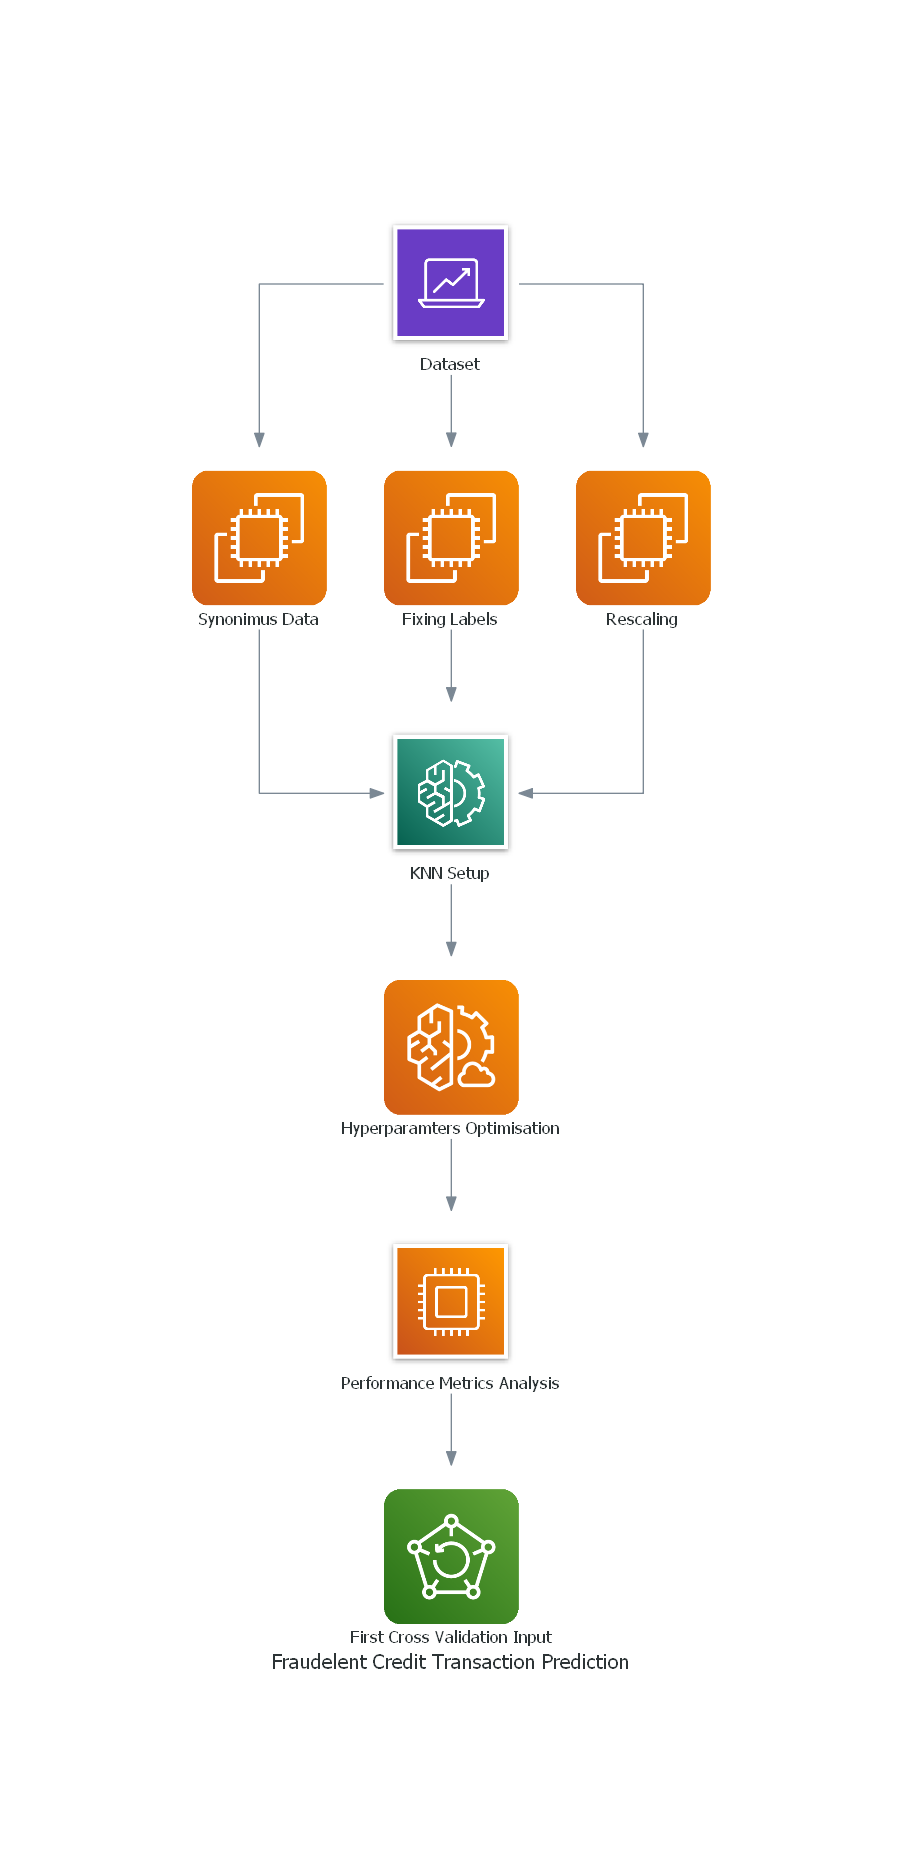

In [11]:
display.Image(r"C:\Users\edgar\OneDrive\Desktop\Diagram1.png") # Import 1st technique processing diagram

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (4 marks)


In [12]:
X_kNN_input = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]
X1 = df[X_kNN_input] 
y1 = df["If_Fraudulent_Flag"] 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [13]:
kNN = KNeighborsClassifier(n_neighbors=2).fit(X_train1, y_train1)
y_pred_before1 = kNN.predict(X_test1)

print(confusion_matrix(y_test1, y_pred_before1)) # Simple 2d matrix presentation of kNN Metrics
print(classification_report(y_test1, y_pred_before1))

[[  96    8]
 [   7 1889]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       104
           1       1.00      1.00      1.00      1896

    accuracy                           0.99      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.99      0.99      0.99      2000



pr(predict+) =  0.9320388349514563
pr(predict-) =  0.9957828149710068


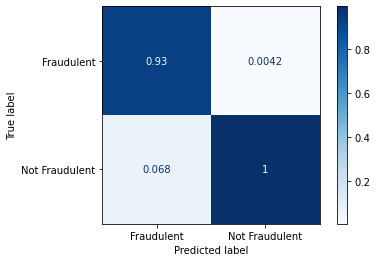

In [14]:
target_labels = ['Fraudulent', 'Not Fraudulent'] # Running confusion matrix before hyperparameters optimisation
confusion = plot_confusion_matrix(kNN, X_test1, y_test1, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')
pr_predict_plus  = confusion.confusion_matrix[0,0]
pr_predict_minus = confusion.confusion_matrix[1,1]
print('pr(predict+) = ', pr_predict_plus)
print('pr(predict-) = ', pr_predict_minus)

### c) Optimising hyper parameters (4 marks) 


In [15]:
# Using RandomizedSearchCV to find the best parameters for kNN model

k = np.random.randint(1,50,60)
params = {"n_neighbors": k}

random_search = RandomizedSearchCV(kNN, params)
random_search.fit(X_train1, y_train1)

print("kNN train score - " + str(random_search.score(X_train1, y_train1)))
print("kNN test score - " + str(random_search.score(X_test1, y_test1)))

kNN train score - 0.9942478429411029
kNN test score - 0.993


In [16]:
best_k_dic = random_search.best_params_
best_k = best_k_dic["n_neighbors"] # Selecting the best K
print(best_k)
print(random_search.best_params_)

6
{'n_neighbors': 6}


In [17]:
kNN_final = KNeighborsClassifier(n_neighbors=best_k).fit(X_train1, y_train1)
y_pred_after1 = kNN_final.predict(X_test1) # This assignes new hyperparameter

print(confusion_matrix(y_test1, y_pred_after1)) # Simple 2d matrix presentation of kNN Metrics
print(classification_report(y_test1, y_pred_after1))

[[  92   12]
 [   2 1894]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       104
           1       0.99      1.00      1.00      1896

    accuracy                           0.99      2000
   macro avg       0.99      0.94      0.96      2000
weighted avg       0.99      0.99      0.99      2000



### d) Performance metrics for training (4 marks)

pr(predict+) =  0.9787234042553191
pr(predict-) =  0.993704092339979


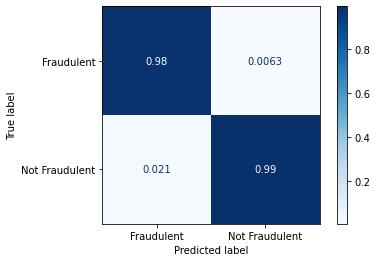

In [18]:
target_labels = ['Fraudulent', 'Not Fraudulent'] # Running confusion matrix before hyperparameters optimisation
confusion = plot_confusion_matrix(kNN_final, X_test1, y_test1, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')
pr_predict_plus  = confusion.confusion_matrix[0,0]
pr_predict_minus = confusion.confusion_matrix[1,1]
print('pr(predict+) = ', pr_predict_plus)
print('pr(predict-) = ', pr_predict_minus)

## 5. Technique (part 2)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process (8 marks)

100-200 words

The decision tree does suit Brits Banks needs because it is easy to maintain algorithm. The user does not require to have advanced statistical knowledge as decision tree output is easy to interpret and read. 

Once class the label has been assigned decision trees require less data preparation processing. The classification can be selected without the need of computing complex calculations. In such cases where a decision tree can support the business need, it can be combined with other methods. 

Furthermore, the decision tree has a set of hyperparameters that could be optimised in the future in the case where data is inconsistent and prediction metrics are showing a decline in accuracy or precision. 

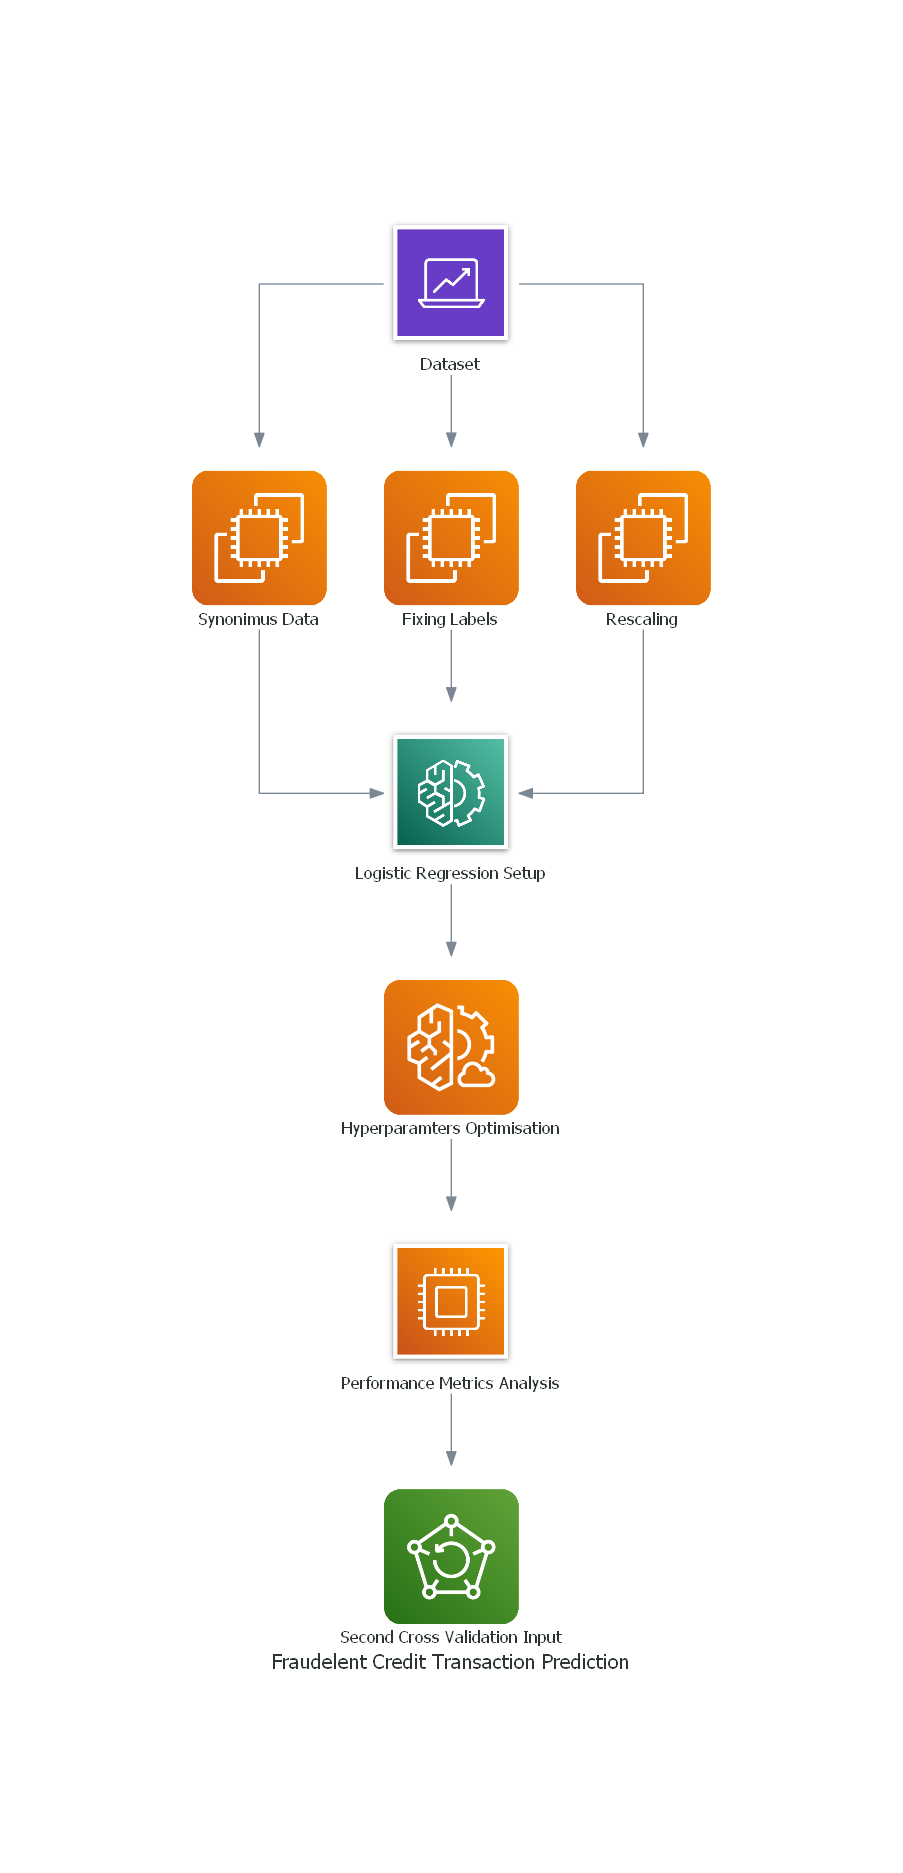

In [19]:
display.Image(r"C:\Users\edgar\OneDrive\Desktop\Diagram2.png") # Import 2nd technique processing diagram

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters (rationale) (4 marks)


In [20]:
X_DT_input = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]
X2 = df[X_DT_input] 
y2 = df["If_Fraudulent_Flag"] 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=11)

DT = DecisionTreeClassifier(max_depth=3).fit(X_train2, y_train2)
y_pred_before2 = DT.predict(X_test2)

print(confusion_matrix(y_test2, y_pred_before2)) # Simple 2d matrix presentation of kNN Metrics
print(classification_report(y_test2, y_pred_before2))

[[ 103    2]
 [   4 1891]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       105
           1       1.00      1.00      1.00      1895

    accuracy                           1.00      2000
   macro avg       0.98      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



pr(predict+) =  0.9626168224299065
pr(predict-) =  0.9989434759640782


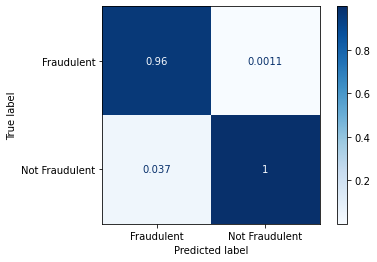

In [21]:
target_labels = ['Fraudulent', 'Not Fraudulent'] # Running confusion matrix before hyperparameters optimisation
confusion = plot_confusion_matrix(DT, X_test2, y_test2, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')
pr_predict_plus  = confusion.confusion_matrix[0,0]
pr_predict_minus = confusion.confusion_matrix[1,1]
print('pr(predict+) = ', pr_predict_plus)
print('pr(predict-) = ', pr_predict_minus)

### c) Optimising hyper parameters (4 marks)


In [22]:
parameters = {'max_depth' : (3,5,7,9,10,15,20,25) # Setting hyperparametres
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ('auto', 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

DT_final = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)
DT_final.fit(X_train2,y_train2)
DT_final.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                       min_samples_split=6)

In [23]:
DT_final = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features="sqrt", max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       )

DT_final.fit(X_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='sqrt',
                       min_samples_split=4)

In [24]:
print (f'Train Accuracy - : {DT_final.score(X_train2,y_train2):.3f}')
print (f'Test Accuracy - : {DT_final.score(X_test2,y_test2):.3f}')

Train Accuracy - : 0.998
Test Accuracy - : 0.998


### d) Performance metrics for training (4 marks)

pr(predict+) =  1.0
pr(predict-) =  0.9978936282253817


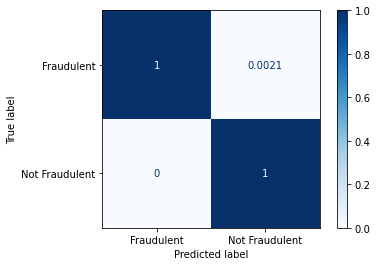

In [25]:
target_labels = ['Fraudulent', 'Not Fraudulent'] # Running confusion matrix before hyperparameters optimisation
confusion = plot_confusion_matrix(DT_final, X_test2, y_test2, display_labels=target_labels, cmap=plt.cm.Blues, normalize='pred')
pr_predict_plus  = confusion.confusion_matrix[0,0]
pr_predict_minus = confusion.confusion_matrix[1,1]
print('pr(predict+) = ', pr_predict_plus)
print('pr(predict-) = ', pr_predict_minus)

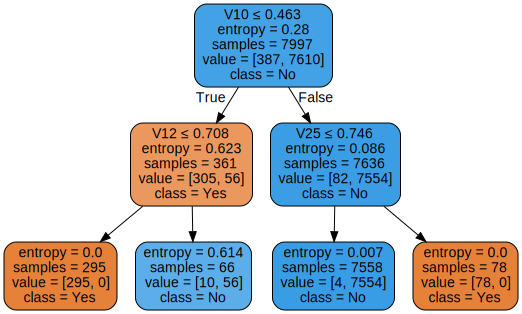

In [26]:
dot_data = export_graphviz(DT_final, # DT dsiplay
                      out_file=None, 
                      feature_names=X2.columns,       
                      class_names=['Yes','No'],      
                      filled=True, rounded=True,
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 6. Comparison of metrics performance for testing 
Enter the correct code in the cells below to execute each of the stated sub-tasks. 


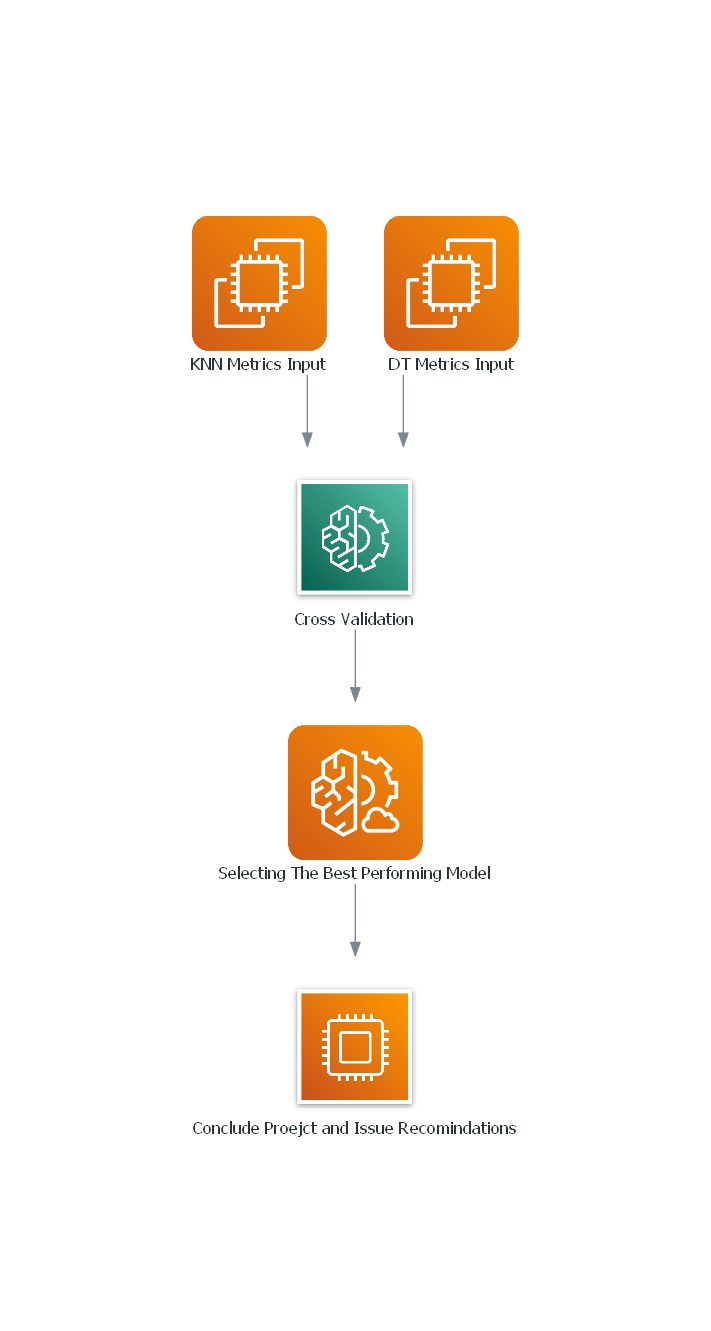

In [27]:
display.Image(r"C:\Users\edgar\OneDrive\Desktop\Diagram3.png") # Import cross validation diagram

### a) Use of cross validation for both techniques to deal with over-fitting (4 marks)

### b) Comparison with appropriate metrics for testing (8 marks)

### c) Model selection (ROC or other charts) (4 marks)

## 7. Final recommendation of best model

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency (4 marks)

100-200 words


Because the initial dataset contained a binary label this suggested that supervised learning methods could be used to solve fraudulent credit transaction problem. kNn and DT models indicated high accuracy and precisions scores prior to the hyperparameter optimisation and that is attributed to the unbalanced dataset which is discussed in the Conclusion section. The current project state demonstrates low overfitting in both technique cases. This is measured by performance metrics. 

### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective (4 marks)

100-200 words`

Brits Bank key project success assessment criteria are to predict at least 90% of fraudulent credit card transactions. Both models pass the Brits Bank assessment threshold. kNN and DT are cost-efficient and simple algorithms to maintain which does not require advanced mathematical or statistical knowledge. 
Both techniques have numerous hyperparameters which can be adjusted to maintain high accuracy and precision metrics if the dataset will become inconsistent in the future. Also, both models have selective DFs feeds therefore if the content of the dataset changes in the future, the new inputs which could be attributed to noise or synonymous data will be excluded from the predictive modelling procedure. 
Because kNN is a memory-based algorithm and it does not require a predefined assumption and performance metrics indicates well-balanced predictive metrics and low misclassification it is my recommendations to use kNN as the primary solution. 

## 8. Conclusion

### a) What has been successfully accomplished and what has not been successful? (4 marks)
100-300 words

Succesful 

Initial understanding of the datasets has determined that Time, Amount and V28.1 columns are attributed to the synonymous and noisy data points. This was determined by checking kNN and DT models performance metrics and select the training set with the highest Precision, Recall and F1-score metrics.
Further observations concluded that the training set can be rescaled using a min-max or standard scaler. Scaling testing has concluded that min-max scaler showed higher Recall and Precision scores therefore this method was chosen for this project. 
The original dataset included a binary label therefore classification or supervised learning techniques were chosen. kNN and DT techniques were selected because they have shown the lowest misclassification rates. 
Hyperparameters optimisation for the kNN and DT showed positive results when compared to the unadjusted models.  

Not Succesful 

Lack of technical understanding and practical knowledge what comes to dealing with unbalanced datasets. During independent research, I have found several ways to deal with unbalanced datasets however I was not able to do so as it required external libraries which are not permitted in this module. The unbalanced dataset can mislead the model user with low misclassification scores however this might not be the case in an instance where the binary label split is 95%/5%. Therefore, I understand that the actual result might be below the acceptable threshold. 


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again? (2 marks)

100-300 words

The biggest challenge I found during this project was an unbalanced dataset. This is a key issue as it creates a false positive outlook that models well and shows high precision and accuracy scores while in reality, it might not be the case. During the Data Sciences module, we did discuss such a scenario however, we never saw an actual implementation of it. In hindsight, I would have spent more time researching and understanding how to implemented sampling techniques on unbalanced datasets. I did try to use a stratified sampling technique however, implementation of it might have been wrong because both models prediction metrics indicated a decrease in accuracy and precision to around 40%. I found that Tensorflow and Imblearn libraries can help in dealing with unbalanced datasets however, in this module we are not permitted to use any other libraries apart from what we used in the module. 

Further, I did try to use the clustering technique as it can be helpful when dealing with in-proportional classes. Unfortunately,  the k-mean algorithm was displaying similar results as supervised learning methods. Given more time I would like to further explore unsupervised learning methods when dealing with unbalanced datasets. 

In general lack of practical knowledge when dealing with unbalanced datasets can be attributed as the primary project issue. 

### c) Provide a wish list of future work that you would like to do (2 marks)

100-200 words

As discussed above the key area I want to focus on after this assignment is dealing with an unbalanced dataset in a practice and not only theoretical way.  

In the future, I would like to have an opportunity to work with image classification modelling. This would benefit me during my projects as one of my hobbies includes deep space image taking and I would like to build a categorisation database for the observed objects.   

Also but not limited to, I would like to work on a baseball player projection model. This would focus on talent scouting, players clustering based on their strengths and prediction of their performance in the future. 

### kNN Hyperparameter Optimisation Method 2

This is my experimental aproch which i build. Loop below checks for the which K value error rate

In [28]:
error = [] # The average of misclassfied data
for i in range(1, 60): # Setting iteration range
    kNN  = KNeighborsClassifier(n_neighbors=i).fit(X_train1, y_train1) # Passing kNN object and fiting model
    pred_i1 = kNN.predict(X_test1) 
    error.append(np.mean(pred_i1 != y_test1)) # Appending i whch is not equal to test input
    

Text(0, 0.5, 'Mean Error')

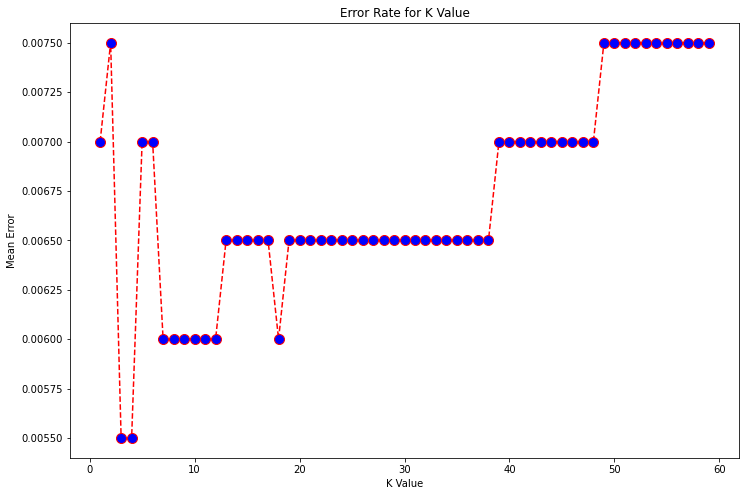

In [29]:
# Ploting above function 

plt.figure(figsize=(12, 8))
plt.plot(range(1, 60), error, color="red", linestyle="dashed", marker="o",
        markerfacecolor="blue", markersize=10)
plt.title("Error Rate for K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")